# QCA Lauzhack participation

### _Problem x_ : Entanglement swapping

The aim of this problem is to transfer entanglement to a set of qubits that were independant initially. In order to do so, you will use python library Qiskit. 

In [30]:
#these are all you need to solve the problem, but you can ofc import other stuff you would need
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
from qiskit import QuantumCircuit, Aer, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt

Consider 6 qubits named 1,2,3,4,5,6. These qubits are initially prepared in EPR pair (these are the maximally entangled 2-qubits states) such that the total initial state is given by $|\Psi\rangle = |\Phi^-\rangle_{1,2} \otimes |\Phi^-\rangle_{3,4} \otimes  |\Phi^-\rangle_{5,6}$, with $|\Phi^-\rangle = \frac{|00\rangle - |11\rangle}{\sqrt{2}}$. So first, using Qiskit, define a circuit which will produce this state.

In [31]:
## your code here : implement a circuit producing \Psi
svsim = Aer.get_backend('aer_simulator')

make_state = QuantumCircuit(6)
make_state.h(0)
make_state.cx(0,1)
make_state.z(1)

make_state.h(2)
make_state.cx(2,3)
make_state.z(3)

make_state.h(4)
make_state.cx(4,5)
make_state.z(5)

state_forward = Statevector.from_instruction(make_state)
print(state_forward)

state_backward = state_forward.evolve(make_state.inverse())
print(state_backward)

Statevector([ 0.35355339+0.j,  0.        +0.j,  0.        +0.j,
             -0.35355339+0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j,  0.        +0.j,
             -0.35355339+0.j,  0.        +0.j,  0.        +0.j,
              0.35355339+0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.       

In [32]:
make_state.draw()

┌───┐          
q_0: ┤ H ├──■───────
     └───┘┌─┴─┐┌───┐
q_1: ─────┤ X ├┤ Z ├
     ┌───┐└───┘└───┘
q_2: ┤ H ├──■───────
     └───┘┌─┴─┐┌───┐
q_3: ─────┤ X ├┤ Z ├
     ┌───┐└───┘└───┘
q_4: ┤ H ├──■───────
     └───┘┌─┴─┐┌───┐
q_5: ─────┤ X ├┤ Z ├
          └───┘└───┘

Once you have this state, imagine that qubits 1,3,5 are in some place together (e.g on EPFL campus), and that qubits 2,4,6 are in some other places far away, let's say the moon. Now, a local measurement is done on qubits 1,3,5, which projects these on a GHZ state, given by $|GHZ\rangle = \frac{|000\rangle + |111\rangle}{\sqrt{2}}$ (it is maximally entangled). 

Using Qiskit class Statevector, implement the code doing the local measurement on your state $|\Psi\rangle$. To do so, use the Statevector class of Qiskit and create the projector corresponding to the local measureament made on 1,3,5.

In [33]:
## your code here : implement the projector

make_state.h(0)
make_state.cx(0,2)
make_state.cx(2,4)
make_state.draw()

┌───┐                    
q_0: ┤ H ├──■─────────■───────
     └───┘┌─┴─┐┌───┐  │       
q_1: ─────┤ X ├┤ Z ├──┼───────
     ┌───┐└───┘└───┘┌─┴─┐     
q_2: ┤ H ├──■───────┤ X ├──■──
     └───┘┌─┴─┐┌───┐└───┘  │  
q_3: ─────┤ X ├┤ Z ├───────┼──
     ┌───┐└───┘└───┘     ┌─┴─┐
q_4: ┤ H ├──■────────────┤ X ├
     └───┘┌─┴─┐┌───┐     └───┘
q_5: ─────┤ X ├┤ Z ├──────────
          └───┘└───┘

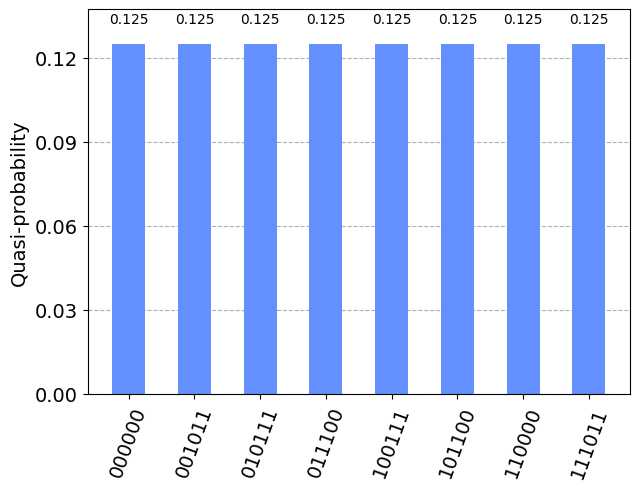

In [34]:
make_state.save_statevector()
qobj = assemble(make_state)
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector = }")
plot_histogram(result.get_counts())

Once it's done you can finally evolve your initial state $|\Psi\rangle$ with the projector, and obtain the final state.

In [35]:
## your code here : do the total evolution to obtain final state

What is the state of 2,4,6 now ? Can you see why is it called entanglement swapping ? Hint : you might need Statevector methods Statevector.evolve() and Statevector.to_operator()